## Marketing Banking Analysis

In [1]:
# Importando as bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
mark = pd.read_csv('BigML_Dataset_64d80bc868671c197c626a0d.csv', on_bad_lines= 'skip')

In [3]:
mark.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Term deposit?
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
mark.shape

(45211, 17)

In [5]:
mark.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
mark.dtypes

age               int64
job              object
marital          object
education        object
default          object
balance           int64
housing          object
loan             object
contact          object
day               int64
month            object
duration          int64
campaign          int64
pdays             int64
previous          int64
poutcome         object
Term deposit?    object
dtype: object

In [7]:
# Renomeando as colunas 

def renomear_colunas_em_portugues(df):
    novo_nome_colunas = {
        'age': 'idade',
        'job': 'profissao',
        'marital': 'estado_civil',
        'education': 'educacao',
        'default': 'tem_credito_emprestimo',
        'balance': 'saldo',
        'housing': 'tem_emprestimo_imobiliario',
        'loan': 'tem_emprestimo_pessoal',
        'contact': 'contato',
        'day': 'dia',
        'month': 'mes',
        'duration': 'duracao',
        'campaign': 'campanha',
        'pdays': 'dias_desde_ultimo_contato',
        'previous': 'contatos_anteriores',
        'poutcome': 'resultado_anterior',
        'Term deposit?': 'deposito_a_prazo'
    }
    
    df.rename(columns=novo_nome_colunas, inplace=True)

In [8]:
# Renomeando Colunas
renomear_colunas_em_portugues(mark)
mark.head()

,idade,profissao,estado_civil,educacao,tem_credito_emprestimo,saldo,tem_emprestimo_imobiliario,tem_emprestimo_pessoal,contato,dia,mes,duracao,campanha,dias_desde_ultimo_contato,contatos_anteriores,resultado_anterior,deposito_a_prazo
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [9]:
# Explorar profissões
profissoes = mark['profissao'].unique()
print(profissoes)

['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']


In [10]:
#renomeando campos
traducoes_profissoes = {
    'management': 'gerência',
    'technician': 'técnico',
    'entrepreneur': 'empreendedor',
    'blue-collar': 'operário',
    'unknown': 'desconhecido',
    'retired': 'aposentado',
    'admin.': 'administrador',
    'services': 'serviços',
    'self-employed': 'autônomo',
    'unemployed': 'desempregado',
    'housemaid': 'empregada doméstica',
    'student': 'estudante'
}

mark['profissao'] = mark['profissao'].replace(traducoes_profissoes)

print(mark)

       idade     profissao estado_civil   educacao tem_credito_emprestimo  \
0         58      gerência      married   tertiary                     no   
1         44       técnico       single  secondary                     no   
2         33  empreendedor      married  secondary                     no   
3         47      operário      married    unknown                     no   
4         33  desconhecido       single    unknown                     no   
...      ...           ...          ...        ...                    ...   
45206     51       técnico      married   tertiary                     no   
45207     71    aposentado     divorced    primary                     no   
45208     72    aposentado      married  secondary                     no   
45209     57      operário      married  secondary                     no   
45210     37  empreendedor      married  secondary                     no   

       saldo tem_emprestimo_imobiliario tem_emprestimo_pessoal    contato  

In [11]:
# Explorar profissões
estado_civil = mark['estado_civil'].unique()
print(estado_civil)

['married' 'single' 'divorced']


In [12]:
traducoes_estado_civil = {
    'married': 'casado(a)',
    'single': 'solteiro(a)',
    'divorced': 'divorciado(a)'
}

mark['estado_civil'] = mark['estado_civil'].replace(traducoes_estado_civil)

print(mark)

       idade     profissao   estado_civil   educacao tem_credito_emprestimo  \
0         58      gerência      casado(a)   tertiary                     no   
1         44       técnico    solteiro(a)  secondary                     no   
2         33  empreendedor      casado(a)  secondary                     no   
3         47      operário      casado(a)    unknown                     no   
4         33  desconhecido    solteiro(a)    unknown                     no   
...      ...           ...            ...        ...                    ...   
45206     51       técnico      casado(a)   tertiary                     no   
45207     71    aposentado  divorciado(a)    primary                     no   
45208     72    aposentado      casado(a)  secondary                     no   
45209     57      operário      casado(a)  secondary                     no   
45210     37  empreendedor      casado(a)  secondary                     no   

       saldo tem_emprestimo_imobiliario tem_emprest

In [13]:
# Explorar educacao
educacao = mark['educacao'].unique()
print(educacao)

['tertiary' 'secondary' 'unknown' 'primary']


In [14]:
traducoes_educacao = {
    'tertiary': 'terciário',
    'secondary': 'secundário',
    'unknown': 'desconhecido',
    'primary': 'primário'
}

mark['educacao'] = mark['educacao'].replace(traducoes_educacao)

print(mark)


       idade     profissao   estado_civil      educacao  \
0         58      gerência      casado(a)     terciário   
1         44       técnico    solteiro(a)    secundário   
2         33  empreendedor      casado(a)    secundário   
3         47      operário      casado(a)  desconhecido   
4         33  desconhecido    solteiro(a)  desconhecido   
...      ...           ...            ...           ...   
45206     51       técnico      casado(a)     terciário   
45207     71    aposentado  divorciado(a)      primário   
45208     72    aposentado      casado(a)    secundário   
45209     57      operário      casado(a)    secundário   
45210     37  empreendedor      casado(a)    secundário   

      tem_credito_emprestimo  saldo tem_emprestimo_imobiliario  \
0                         no   2143                        yes   
1                         no     29                        yes   
2                         no      2                        yes   
3                         n

In [15]:

# Criar um dicionário para mapear os valores abreviados dos meses para o nome completo dos meses
meses = {
    'jan': 'Janeiro',
    'feb': 'Fevereiro',
    'mar': 'Março',
    'apr': 'Abril',
    'may': 'Maio',
    'jun': 'Junho',
    'jul': 'Julho',
    'aug': 'Agosto',
    'sep': 'Setembro',
    'oct': 'Outubro',
    'nov': 'Novembro',
    'dec': 'Dezembro'
}

# Calcular a contagem de clientes por mês
contagem_por_mes = mark['mes'].map(meses).value_counts().reset_index()
contagem_por_mes.columns = ['Mês', 'Contagem']

# Mostrar a contagem de clientes por mês
print(contagem_por_mes)


          Mês  Contagem
0        Maio     13766
1       Julho      6895
2      Agosto      6247
3       Junho      5341
4    Novembro      3970
5       Abril      2932
6   Fevereiro      2649
7     Janeiro      1403
8     Outubro       738
9    Setembro       579
10      Março       477
11   Dezembro       214


In [16]:
Tem_emprestimo_imobiliario = mark.loc[mark["tem_emprestimo_imobiliario"] == "yes"]
Tem_emprestimo_imobiliario.head()

,idade,profissao,estado_civil,educacao,tem_credito_emprestimo,saldo,tem_emprestimo_imobiliario,tem_emprestimo_pessoal,contato,dia,mes,duracao,campanha,dias_desde_ultimo_contato,contatos_anteriores,resultado_anterior,deposito_a_prazo
0,58,gerência,casado(a),terciário,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,técnico,solteiro(a),secundário,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,empreendedor,casado(a),secundário,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,operário,casado(a),desconhecido,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
5,35,gerência,casado(a),terciário,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no


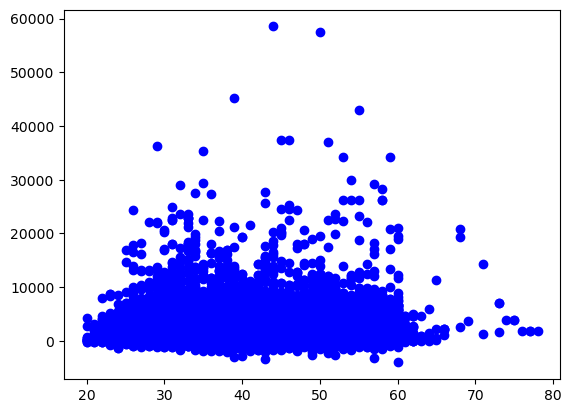

In [17]:
plt.scatter(x=Tem_emprestimo_imobiliario["idade"], y = Tem_emprestimo_imobiliario["saldo"], color = 'blue');

In [18]:
# Estado civil e idade média de clientes com empréstimo imobiliario
Tem_emprestimo_imobiliario.groupby("estado_civil")["idade"].mean()

estado_civil
casado(a)        40.769140
divorciado(a)    43.510148
solteiro(a)      33.811504
Name: idade, dtype: float64

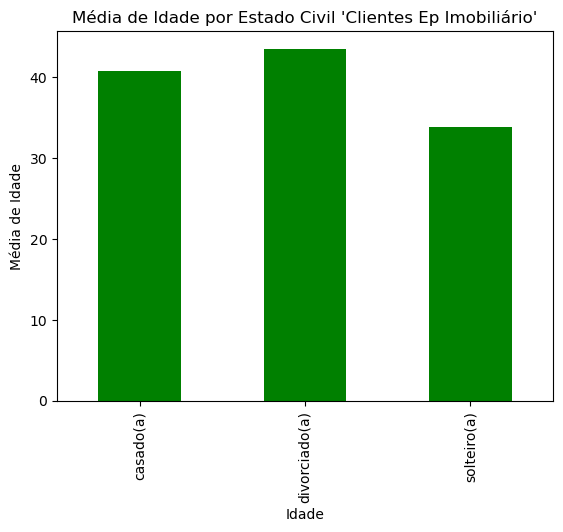

In [19]:
idade_estado_civil = Tem_emprestimo_imobiliario.groupby("estado_civil")["idade"].mean()
idade_estado_civil.plot(kind="bar", color='green')
plt.title("Média de Idade por Estado Civil 'Clientes Ep Imobiliário'")
plt.xlabel("Idade")
plt.ylabel("Média de Idade")
plt.show()

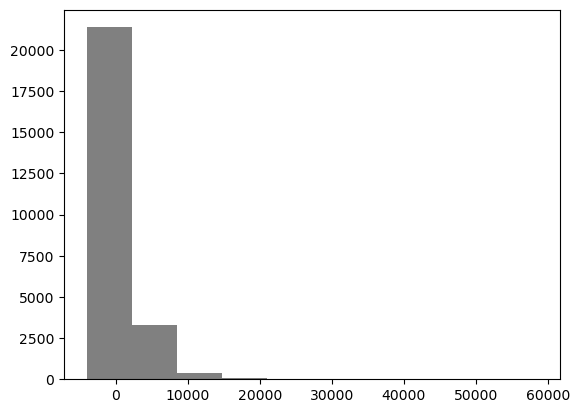

In [20]:
# Histograma Saldo dos clientes com empréstimo
plt.hist(Tem_emprestimo_imobiliario["saldo"], color = 'grey');

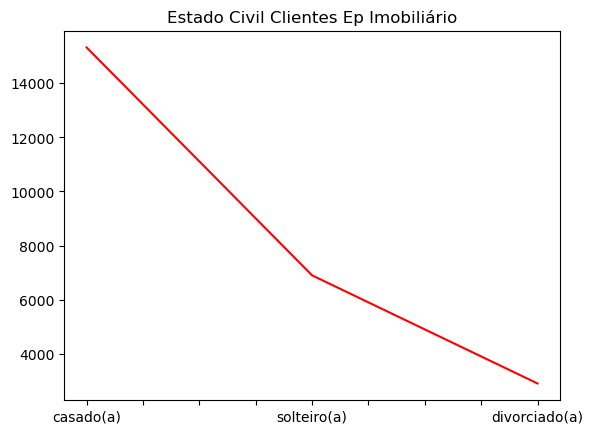

In [21]:
Tem_emprestimo_imobiliario["estado_civil"].value_counts().plot(color='red' , title ='Estado Civil Clientes Ep Imobiliário');

In [22]:
# Profissão e idade média de clientes com empréstimo imobiliario
Tem_emprestimo_imobiliario.groupby("profissao")["idade"].mean()

profissao
administrador          38.349151
aposentado             56.405295
autônomo               39.805229
desconhecido           44.500000
desempregado           39.821363
empreendedor           40.616801
empregada doméstica    41.510050
estudante              27.353414
gerência               39.523301
operário               38.912457
serviços               37.886840
técnico                38.627947
Name: idade, dtype: float64

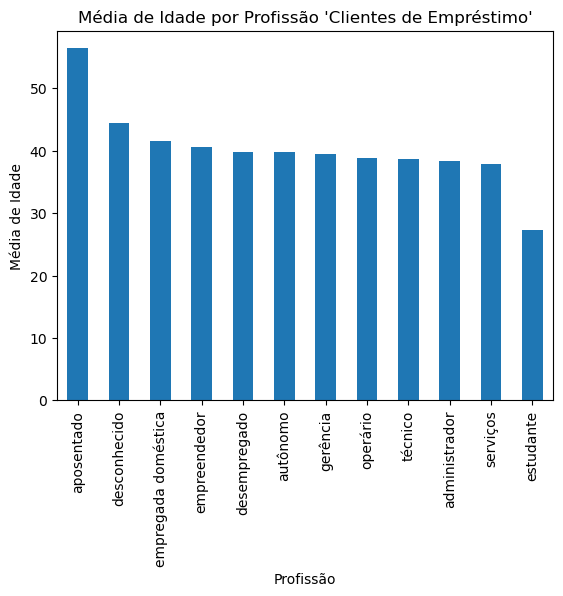

In [23]:
# Profissão e idade média de clientes com empréstimo imobiliario
grupo_profissao = Tem_emprestimo_imobiliario.groupby("profissao")["idade"].mean()
grupo_profissao_sorted = grupo_profissao.sort_values(ascending=False)  # Ordena em ordem decrescente

grupo_profissao_sorted.plot(kind="bar")
plt.title("Média de Idade por Profissão 'Clientes de Empréstimo'")
plt.xlabel("Profissão")
plt.ylabel("Média de Idade")
plt.show()

In [24]:
# Profissão e saldo médio de clientes com empréstimo imobiliario
Tem_emprestimo_imobiliario.groupby("profissao")["saldo"].mean()

profissao
administrador           983.989315
aposentado             1302.279022
autônomo               1353.346405
desconhecido           1630.807692
desempregado           1232.151013
empreendedor           1278.798619
empregada doméstica    1183.391960
estudante              1223.879518
gerência               1610.207567
operário                978.860528
serviços                989.040853
técnico                1205.064156
Name: saldo, dtype: float64

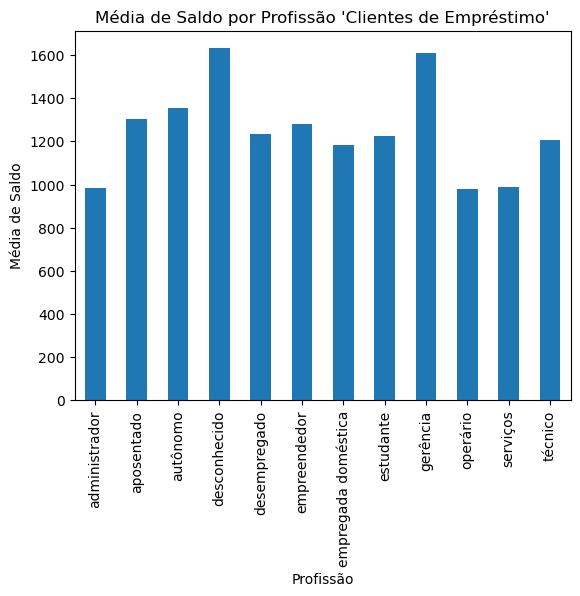

In [25]:
grupo_profissao = Tem_emprestimo_imobiliario.groupby("profissao")["saldo"].mean()
grupo_profissao.plot(kind="bar")
plt.title("Média de Saldo por Profissão 'Clientes de Empréstimo'")
plt.xlabel("Profissão")
plt.ylabel("Média de Saldo")
plt.show()